In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [23]:
data=pd.read_csv('Data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


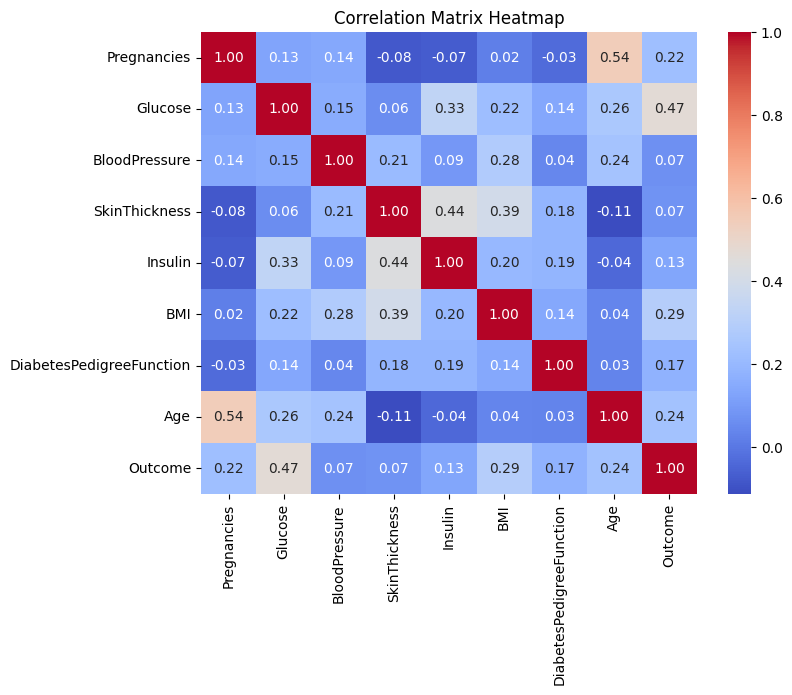

In [5]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [6]:
train,validation,test=np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])
test

/home/moundher/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
730,3,130,78,23,79,28.4,0.323,34,1
150,1,136,74,50,204,37.4,0.399,24,0
372,0,84,64,22,66,35.8,0.545,21,0
125,1,88,30,42,99,55.0,0.496,26,1
564,0,91,80,0,0,32.4,0.601,27,0
...,...,...,...,...,...,...,...,...,...
588,3,176,86,27,156,33.3,1.154,52,1
235,4,171,72,0,0,43.6,0.479,26,1
190,3,111,62,0,0,22.6,0.142,21,0
334,1,95,60,18,58,23.9,0.260,22,0


In [7]:
coll=data.columns

In [8]:
scalle=StandardScaler()
x=scalle.fit_transform(train.iloc[:,:-1])
y=train.iloc[:,-1]
y = y.values.reshape(-1, 1)
t=np.hstack((x,y))
train=pd.DataFrame(t,columns=coll)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.844976,0.825707,1.289818,1.249378,-0.699964,2.304288,-0.341431,-0.544303,1.0
1,-0.844976,-0.402278,0.973860,-0.111917,-0.699964,-0.653589,-0.209597,-0.801542,0.0
2,-0.549619,-0.969040,0.025986,-0.235671,-0.699964,-0.626941,-1.198352,-0.973034,0.0
3,0.041093,1.959231,-3.660189,-1.287580,-0.699964,-0.480380,-0.799711,0.227414,1.0
4,1.222518,0.699760,-0.184652,-1.287580,-0.699964,0.385665,-1.060240,0.656146,1.0
...,...,...,...,...,...,...,...,...,...
455,-0.844976,1.864771,-3.660189,-1.287580,-0.699964,1.504862,-0.579988,0.656146,1.0
456,2.403943,-0.906067,-0.395291,-0.854441,1.434076,-0.586970,1.441467,0.913385,1.0
457,0.631805,-0.591199,0.657902,-1.287580,-0.699964,-0.160609,-0.900156,0.227414,1.0
458,1.222518,1.833284,0.131306,1.311255,0.375327,0.092542,0.791714,0.227414,1.0


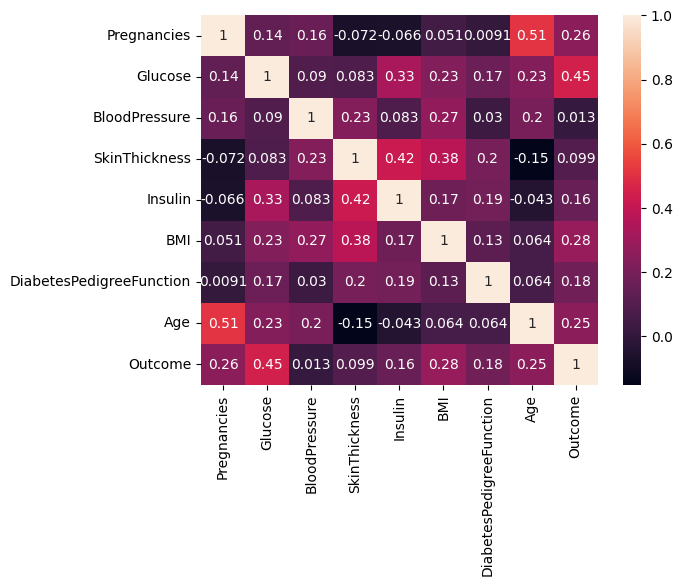

In [9]:
sns.heatmap(train.corr(),annot=True)
plt.show()

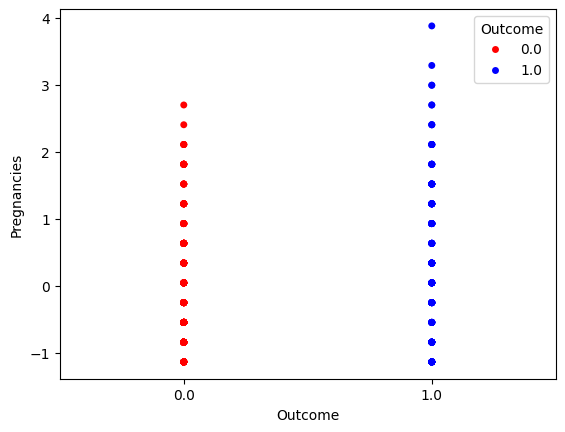

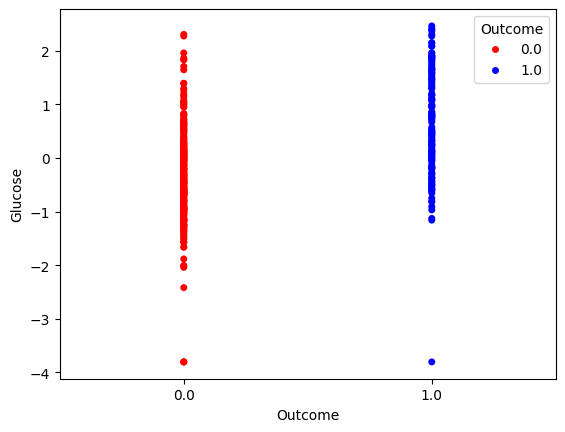

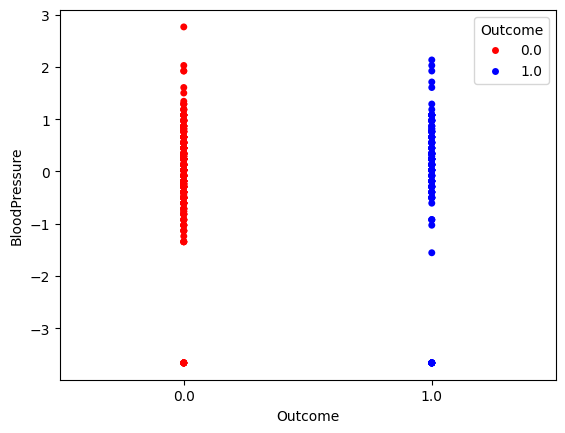

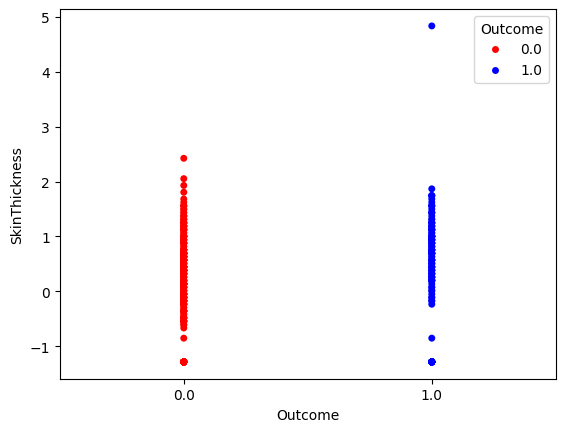

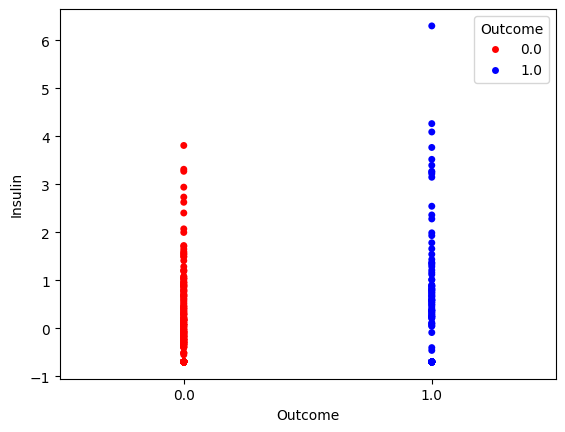

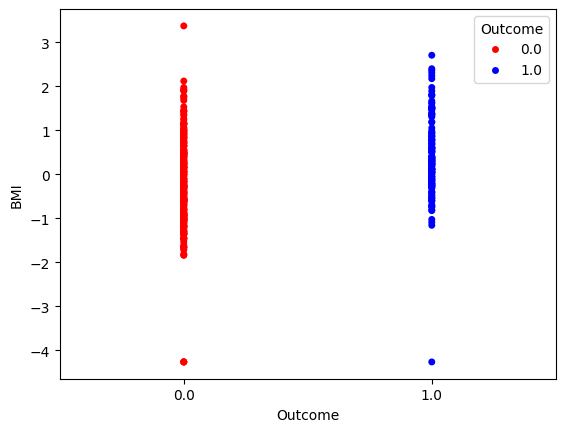

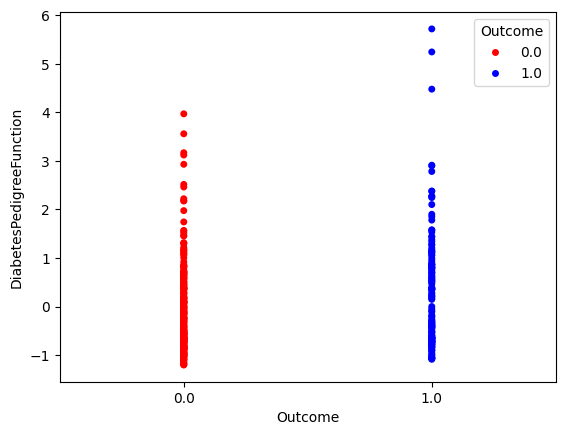

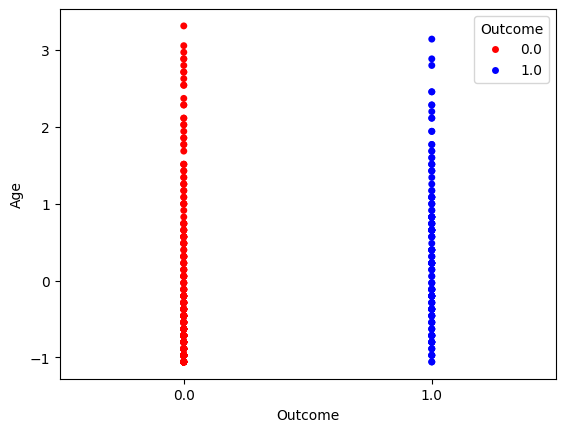

In [10]:
for i in coll[:-1]:
    sns.stripplot(y=i, x='Outcome', data=train, jitter=0, hue='Outcome',palette={0: 'red', 1: 'blue'})
    plt.show()

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               460 non-null    float64
 1   Glucose                   460 non-null    float64
 2   BloodPressure             460 non-null    float64
 3   SkinThickness             460 non-null    float64
 4   Insulin                   460 non-null    float64
 5   BMI                       460 non-null    float64
 6   DiabetesPedigreeFunction  460 non-null    float64
 7   Age                       460 non-null    float64
 8   Outcome                   460 non-null    float64
dtypes: float64(9)
memory usage: 32.5 KB


In [12]:
print(len(train[train['Outcome']==1]))
print(len(train[train['Outcome']==0]))

153
307


In [13]:
train_set=train.iloc[:,:-1].values
targget_set=train['Outcome'].values


In [14]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_set,targget_set)

KNeighborsClassifier(n_neighbors=3)

In [15]:
sample=scalle.fit_transform(test.iloc[:,:-1])
y=test.iloc[:,-1].values.reshape((-1,1))
test=np.hstack((sample,y))
pd.DataFrame(test,columns=coll)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.211184,0.256833,0.492080,0.212518,0.013864,-0.362991,-0.479529,0.051669,1.0
1,-0.813450,0.453284,0.289187,2.076760,1.194758,0.781732,-0.249776,-0.744034,0.0
2,-1.114583,-1.249296,-0.218043,0.143472,-0.108949,0.578226,0.191592,-0.982745,0.0
3,-0.813450,-1.118328,-1.942628,1.524392,0.202807,3.020304,0.043461,-0.584894,1.0
4,-1.114583,-1.020102,0.593526,-1.375540,-0.732461,0.145775,0.360883,-0.505323,0.0
...,...,...,...,...,...,...,...,...,...
149,-0.211184,1.762961,0.897864,0.488702,0.741295,0.260247,2.032638,1.483935,1.0
150,0.089949,1.599251,0.187741,-1.375540,-0.732461,1.570320,-0.007931,-0.584894,1.0
151,-0.211184,-0.365264,-0.319489,-1.375540,-0.732461,-1.100702,-1.026703,-0.982745,0.0
152,-0.813450,-0.889134,-0.420936,-0.132712,-0.184526,-0.935353,-0.669982,-0.903175,0.0


In [ ]:
from sklearn.metrics import classification_report

predict=model.predict(sample)
print(classification_report(predict,y))


              precision    recall  f1-score   support

         0.0       0.86      0.72      0.78       110
         1.0       0.50      0.70      0.58        44

    accuracy                           0.71       154
   macro avg       0.68      0.71      0.68       154
weighted avg       0.76      0.71      0.73       154



In [17]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(train_set,targget_set)


GaussianNB()

In [18]:
predict=model.predict(sample)
print(classification_report(predict,y))

              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78       105
         1.0       0.55      0.69      0.61        49

    accuracy                           0.72       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.75      0.72      0.73       154



In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_set,targget_set)

LogisticRegression()

In [22]:
predict=model.predict(sample)
print(classification_report(predict,y))

              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79       112
         1.0       0.50      0.74      0.60        42

    accuracy                           0.73       154
   macro avg       0.69      0.73      0.70       154
weighted avg       0.78      0.73      0.74       154

